<a href="https://colab.research.google.com/github/vikramket/project/blob/main/StockPredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Long Short Term Memory(LSTM).
#predict the closing price of a stock.

In [3]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 3.3 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [5]:
!pip install yfinance
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [6]:
# get the stock quote
df = pdr.get_data_yahoo('HDFCBANK.NS', start='2012-01-01', end='2023-01-04')
#show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,214.449997,214.899994,209.750000,213.425003,197.498596,3514998
2012-01-03,215.699997,220.449997,215.000000,219.574997,203.189667,3439238
2012-01-04,220.949997,222.475006,215.425003,221.649994,205.109818,4871478
2012-01-05,222.000000,223.350006,220.149994,221.824997,205.271774,3380606
2012-01-06,220.500000,228.574997,219.475006,226.649994,209.736710,3977222
...,...,...,...,...,...,...
2022-12-28,1623.099976,1633.000000,1623.099976,1629.800049,1629.800049,4345935
2022-12-29,1620.099976,1643.500000,1611.000000,1641.300049,1641.300049,5506448
2022-12-30,1645.000000,1645.000000,1620.000000,1628.150024,1628.150024,3561320


In [7]:
#No of rows and columns in dataframe
df.shape

(2715, 6)

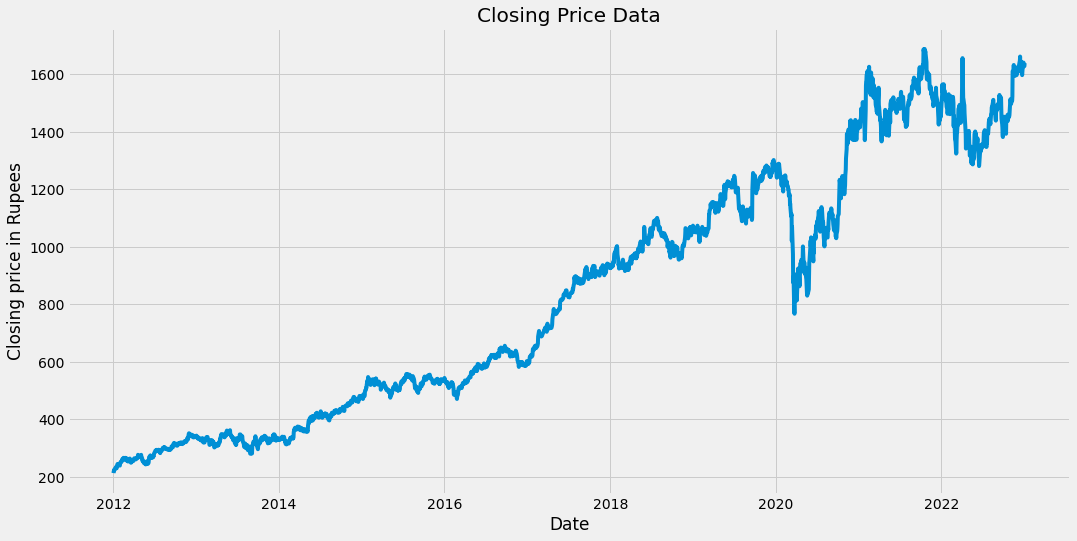

In [8]:
#Visualize the closing price data
plt.figure(figsize=(16,8))
plt.title('Closing Price Data')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=17)
plt.ylabel('Closing price in Rupees',fontsize=17)
plt.show()

In [9]:
#filtering out only closing price data in new dataframe
data =df.filter(['Close'])
#converting dataset into numpy array
dataset =data.values
#get the no of rows to train the model on
training_data_len =math.ceil(len(dataset)*.8)
#print length
training_data_len

2172

In [10]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.        ],
       [0.00416871],
       [0.00557523],
       ...,
       [0.95895685],
       [0.95932962],
       [0.96654862]])

In [11]:
#create the dataset
#create the scaled training data set
train_data =scaled_data[0:training_data_len ,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
 
for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i,0])
   y_train.append(train_data[i,0])
   if i<=61:
     print(x_train)
     print(y_train)
     print()


[array([0.        , 0.00416871, 0.00557523, 0.00569385, 0.00896442,
       0.00977784, 0.01113352, 0.01213333, 0.01348901, 0.01448882,
       0.01140465, 0.01408212, 0.01865753, 0.02031824, 0.02158919,
       0.01936927, 0.02099608, 0.02147058, 0.01943706, 0.01769161,
       0.02211452, 0.02382606, 0.02408025, 0.02691024, 0.02740167,
       0.02794394, 0.02765586, 0.03243463, 0.03072308, 0.03223128,
       0.03085866, 0.03599328, 0.03375642, 0.03438342, 0.03565436,
       0.03545102, 0.03602719, 0.03314637, 0.03007913, 0.03512904,
       0.03058751, 0.02953686, 0.03114673, 0.02850316, 0.02729999,
       0.03009609, 0.03265493, 0.03121452, 0.03306164, 0.03434953,
       0.02845232, 0.02745251, 0.02440223, 0.02662215, 0.03009609,
       0.0262324 , 0.02951992, 0.0287404 , 0.03118062, 0.02935046])]
[0.028215079536896503]

[array([0.        , 0.00416871, 0.00557523, 0.00569385, 0.00896442,
       0.00977784, 0.01113352, 0.01213333, 0.01348901, 0.01448882,
       0.01140465, 0.01408212, 0.0

In [12]:
#convert x_train and y_train to numpy arrays
x_train,y_train =np.array(x_train),np.array(y_train)

In [13]:
# reshape the data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2112, 60, 1)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False)) 
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2112/2112 [==============================] - 68s 30ms/step - loss: 8.3323e-04


In [33]:
#create testing dataset
#create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [20]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 22ms/step


In [21]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

73.00969098900782

<ipython-input-34-37e73cd41943>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


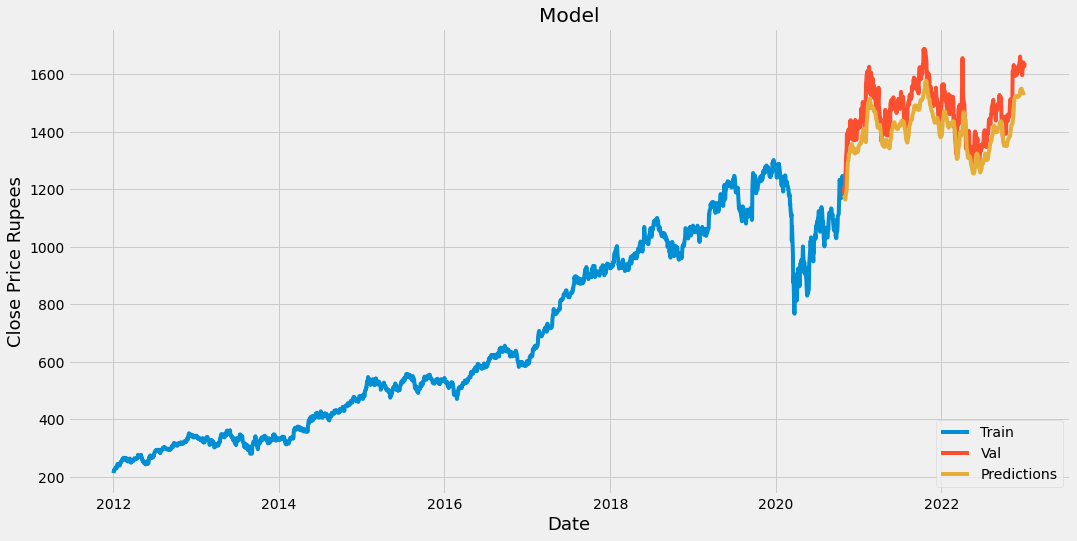

In [34]:
#Plot the data

train = data[:training_data_len]

valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees', fontsize=18)
plt.plot(train[ 'Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
#show valid prices and predoicted prices
valid

,Close,Predictions
Date,,
2020-10-28,1209.599976,1180.666504
2020-10-29,1187.199951,1179.378784
2020-10-30,1183.550049,1174.175537
2020-11-02,1215.250000,1167.458618
2020-11-03,1247.949951,1164.887573
...,...,...
2022-12-28,1629.800049,1533.806641
2022-12-29,1641.300049,1534.604858
2022-12-30,1628.150024,1537.211792


In [37]:
#Get the quote

hdfcbank_quote = pdr.get_data_yahoo('HDFCBANK.NS', start='2022-11-02', end='2023-01-02')
#Create a new dataframe

new_df = hdfcbank_quote.filter(['Close'])

#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list

X_test = []

#Append the past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array

X_test = np.array(X_test)

#Reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling

pred_price = scaler. inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 28ms/step
[[1538.4521]]


In [38]:
#Get the quote

hdfcbank_quote2 = pdr.get_data_yahoo('HDFCBANK.NS', start='2023-01-03', end='2023-01-04')
print(hdfcbank_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-01-03    1639.349976
Name: Close, dtype: float64
